# Итерационные методы решения систем и нахождения собственных значений.

## Имплементация итерационного метода нахождения собственных векторов

In [4]:
import numpy as np

$$x^{k+1} = P x^k + b̄$$

Нахождение решения:
- инициализируем матрицу С, которая даст наибольшее сокращение по диагонали

На каждом шаге:
- приближаем $x$ с помощью формулы
$$ x^{k+1} = P x^k + b̄ = (E - CA)x + CB $$
- проверяем для матрицы $ (E - CA) $, какой у неё спектральный радиус; если он больше единицы, функция печатает "не сойдётся" и возвращает None
- если сойдётся, переходим на следующий шаг рекурсии.

In [2]:
def count_radius(A):
    '''считает спектральный радиус (наибольшее собственное значение), необходимое для проверки того, 
    сойдётся решение или нет'''
    if np.sum(np.isinf(A.getA())) == 0:
        l = abs(max(np.linalg.eig(A)[0]))
        if np.abs(l) < 1:
            return True
    return False

def approximize(A, B, C, x):
    '''шаг аппроксимации x'''
    E = np.diag([1]*len(A)) # единичная матрица того же размера, что и А
    x1 = (E-C*A)*x+C*B # x = Px+b, где P = (E-CA), b = CB
    if count_radius(E-C*A): # проверка на сходимость
        if np.sum(np.abs(x - x1))/len(x) < 0.001:
            return x
        return approximize(A, B, C, x1)
    else:
        return 'не сойдётся'

def find_decision(A, B):
    '''находит решение для системы уравнений Ax = B методом итераций'''
    try:
        diag = A.diagonal().getA()[0] # для недиагональной матрицы
    except:
        diag = A.diagonal() # для диагональной матрицы
    C = np.diag(1/diag)
    x = C*B
    x = approximize(A, B, C, x)
    return x
    

A = np.matrix('20 3 1; 2 20 3; 3 1 10')
B = np.matrix('68; 41; 60')
find_decision(A, B)

matrix([[3.00023691],
        [1.00028953],
        [5.00036391]])

### Визуализация

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

Для визуализаци, переоределим функции `find_decision` и `approximize`:

In [57]:
def find_decision(A, B):
    '''находит решение для системы уравнений Ax = B методом итераций'''
    print('THRESHOLD: ' + str(THRESHOLD))
    nsteps = 0
    try:
        diag = A.diagonal().getA()[0] # для недиагональной матрицы
    except:
        diag = A.diagonal() # для диагональной матрицы
    C = np.diag(1/diag)
    x = C*B
    x, nsteps = approximize(A, B, C, x, nsteps)
    print('\n\nApproximation took {} steps'.format(nsteps))
    return x

def approximize(A, B, C, x, nsteps):
    '''шаг аппроксимации x'''
    x1, x2, x3 = x.getA()
    color = 'b' if nsteps < 3 else 'r' # первую точку раскрвшиваем синим
    m = 'o' if nsteps else 'x' # первый вектор обозначаем звёздочкой
    sbpl.scatter([x1], [x2], [x3], c=color, marker=m)
    print(*x.getA())
    nsteps += 1
    E = np.diag([1]*len(A)) # единичная матрица того же размера, что и А
    x1 = (E-C*A)*x+C*B # x = Px+b, где P = (E-CA), b = CB
    if count_radius(E-C*A): # проверка на сходимость
        if np.sum(np.abs(x - x1))/len(x) < THRESHOLD:
            return x, nsteps
        return approximize(A, B, C, x1, nsteps)
    else:
        print('не сойдётся')
        return None, nsteps


Первые три шага будут отображаться синим цветом, следующие красным.

Сначала зададим некоторые переменные: мартицу `A`, вектор решений `B` и порог, после которого мы считаем аппроксимацию достаточной.

In [58]:
A = np.matrix('20 3 1; 2 20 3; 3 1 10')
B = np.matrix('68; 41; 60')
print('A:\n{0}\nB:\n{1}'.format(A, B))

A:
[[20  3  1]
 [ 2 20  3]
 [ 3  1 10]]
B:
[[68]
 [41]
 [60]]


In [59]:
THRESHOLD = 0.001

<IPython.core.display.Javascript object>


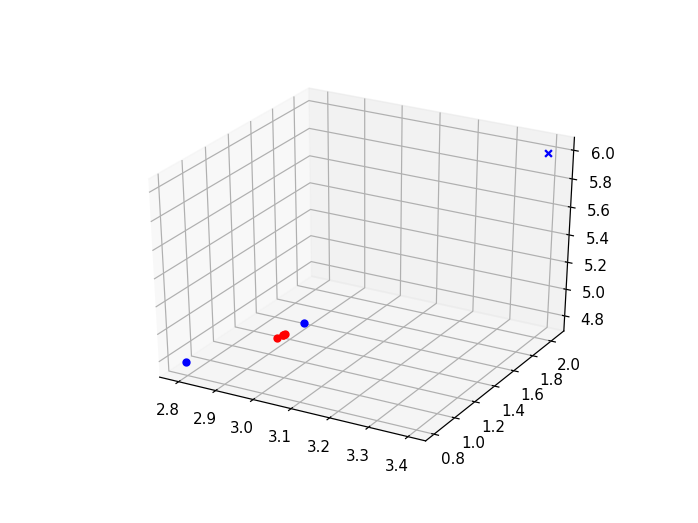

THRESHOLD: 0.001
[3.4] [2.05] [6.]
[2.7925] [0.81] [4.775]
[3.03975] [1.0545] [5.08125]
[2.9877625] [0.9838375] [4.982625]
[3.00329313] [1.00383] [5.0052875]
[2.99916113] [0.99887756] [4.99862906]
[3.00023691] [1.00028953] [5.00036391]


Approximation took 7 steps


In [60]:
fig = plt.figure()
sbpl = fig.add_subplot(111, projection='3d')
x = find_decision(A, B)

#### То же самое для других матриц

In [6]:
A = np.matrix('32 6 12; 14 30 3; 12 8 45')
B = np.matrix('63; 48; 72')
print('A:\n{0}\nB:\n{1}'.format(A, B))

A:
[[32  6 12]
 [14 30  3]
 [12  8 45]]
B:
[[63]
 [48]
 [72]]


<IPython.core.display.Javascript object>


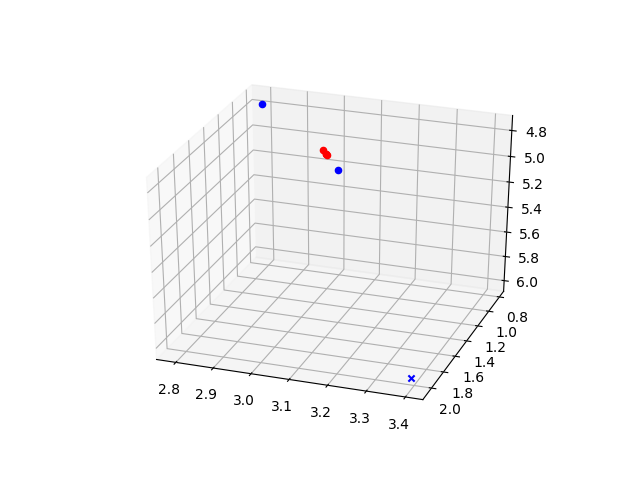

THRESHOLD: 0.001
[3.4] [2.05] [6.]
[2.7925] [0.81] [4.775]
[3.03975] [1.0545] [5.08125]
[2.9877625] [0.9838375] [4.982625]
[3.00329313] [1.00383] [5.0052875]
[2.99916113] [0.99887756] [4.99862906]
[3.00023691] [1.00028953] [5.00036391]


Approximation took 7 steps


In [32]:
%matplotlib notebook
fig = plt.figure()
sbpl = fig.add_subplot(111, projection='3d')
x = find_decision(A, B)

In [10]:
A = np.matrix('32 445 12; 14 30 3; 12 8 45')
B = np.matrix('63; 48; 72')
print('A:\n{0}\nB:\n{1}'.format(A, B))

A:
[[ 32 445  12]
 [ 14  30   3]
 [ 12   8  45]]
B:
[[63]
 [48]
 [72]]


<IPython.core.display.Javascript object>


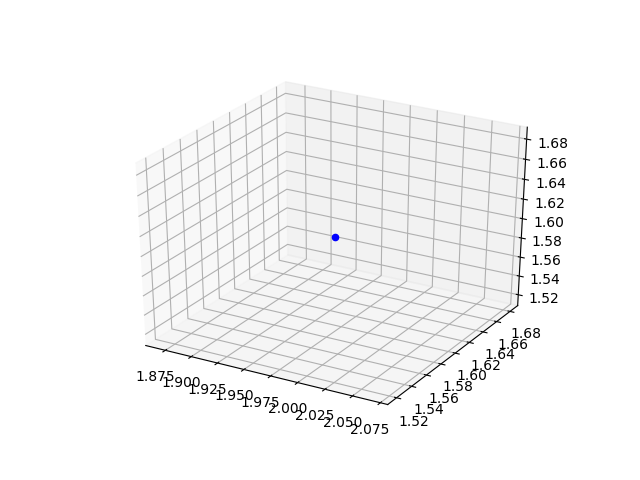

THRESHOLD: 0.001
[1.96875] [1.6] [1.6]
не сойдётся


Approximation took 1 steps


In [11]:
fig = plt.figure()
sbpl = fig.add_subplot(111, projection='3d')
x = find_decision(A, B)

#### Для матрицы 2x2:

In [33]:
A = np.matrix('6 -1; -5 6')
B = np.matrix('5; 1')
print('A:\n{0}\nB:\n{1}'.format(A, B))

A:
[[ 6 -1]
 [-5  6]]
B:
[[5]
 [1]]


In [40]:
def approximize(A, B, C, x, nsteps):
    '''шаг аппроксимации x'''
    x1, x2 = x.getA()
    color = 'b' if nsteps < 3 else 'r' # первую точку раскрвшиваем синим
    m = 'o' if nsteps else 'x' # первый вектор обозначаем звёздочкой
    sbpl.scatter([x1], [x2], [0], c=color, marker=m)
    print(*x.getA())
    nsteps += 1
    E = np.diag([1]*len(A)) # единичная матрица того же размера, что и А
    x1 = (E-C*A)*x+C*B # x = Px+b, где P = (E-CA), b = CB
    if count_radius(E-C*A): # проверка на сходимость
        if np.sum(np.abs(x - x1))/len(x) < THRESHOLD:
            return x, nsteps
        return approximize(A, B, C, x1, nsteps)
    else:
        print('не сойдётся')
        return None, nsteps

<IPython.core.display.Javascript object>


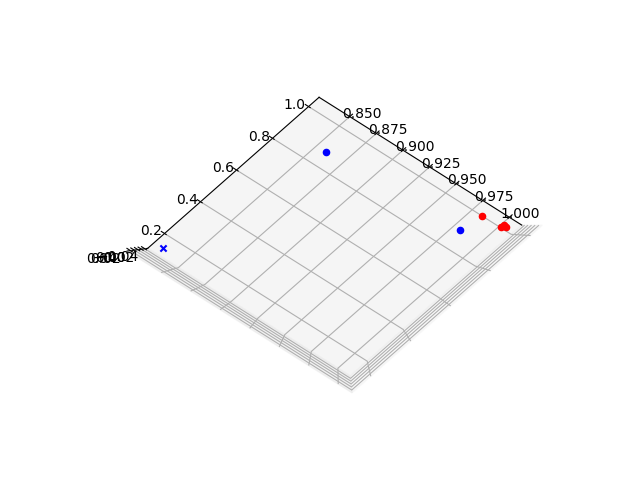

THRESHOLD: 0.001
[0.83333333] [0.16666667]
[0.86111111] [0.86111111]
[0.97685185] [0.88425926]
[0.98070988] [0.98070988]
[0.99678498] [0.9839249]
[0.99732082] [0.99732082]
[0.99955347] [0.99776735]


Approximation took 7 steps


In [41]:
fig = plt.figure()
sbpl = fig.add_subplot(111, projection='3d')
x = find_decision(A, B)

In [44]:
A = np.matrix('42 -12; -4 17')
B = np.matrix('76; 98')
print('A:\n{0}\nB:\n{1}'.format(A, B))

A:
[[ 42 -12]
 [ -4  17]]
B:
[[76]
 [98]]


<IPython.core.display.Javascript object>


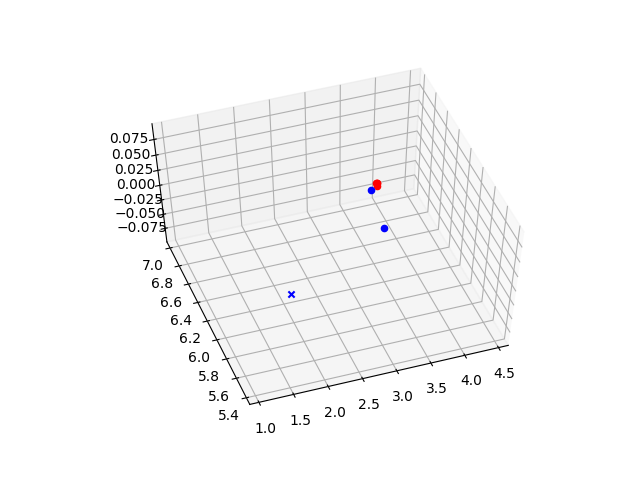

THRESHOLD: 0.001
[1.80952381] [5.76470588]
[3.45658263] [6.19047619]
[3.57823129] [6.57801944]
[3.68895794] [6.60664266]
[3.697136] [6.63269598]
[3.70457981] [6.63462023]
[3.70512959] [6.63637172]


Approximation took 7 steps


In [45]:
fig = plt.figure()
sbpl = fig.add_subplot(111, projection='3d')
x = find_decision(A, B)

#### Попробуем теперь с порогом на порядок меньше:

In [104]:
A = np.matrix('20 3 1; 2 20 3; 3 1 10')
B = np.matrix('68; 41; 60')
print('A:\n{0}\nB:\n{1}'.format(A, B))

A:
[[20  3  1]
 [ 2 20  3]
 [ 3  1 10]]
B:
[[68]
 [41]
 [60]]


In [48]:
THRESHOLD = 0.00001

<IPython.core.display.Javascript object>


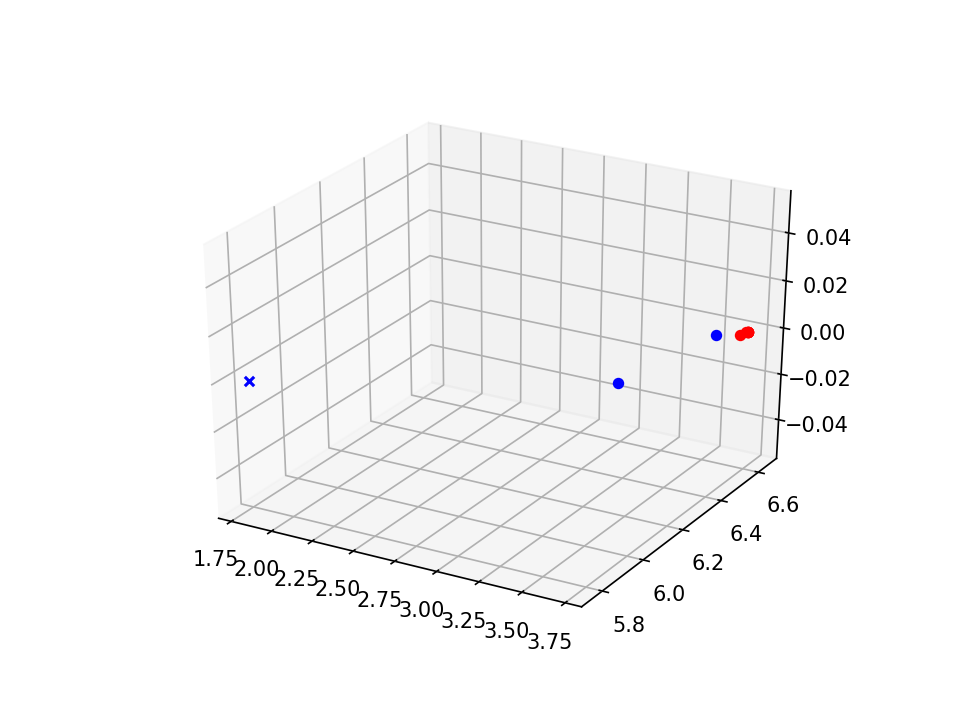

THRESHOLD: 1e-05
[1.80952381] [5.76470588]
[3.45658263] [6.19047619]
[3.57823129] [6.57801944]
[3.68895794] [6.60664266]
[3.697136] [6.63269598]
[3.70457981] [6.63462023]
[3.70512959] [6.63637172]
[3.70563001] [6.63650108]
[3.70566698] [6.63661883]
[3.70570062] [6.63662752]


Approximation took 10 steps


matrix([[3.70570062],
        [6.63662752]])

In [49]:
fig = plt.figure()
sbpl = fig.add_subplot(111, projection='3d')
find_decision(A, B)

### Зависимость количества итераций от величины порога 

Снова переопределяем функции аппроксимации:

In [7]:
def find_decision(A, B, boundary):
    '''находит решение для системы уравнений Ax = B методом итераций'''
#     print('TRESHHOLD: ' + str(TRESHHOLD))
    nsteps = 0
    try:
        diag = A.diagonal().getA()[0] # для недиагональной матрицы
    except:
        diag = A.diagonal() # для диагональной матрицы
    C = np.diag(1/diag)
    x = C*B
    x, nsteps = approximize(A, B, C, x, nsteps, boundary)
#     print('Approximation took {} steps'.format(nsteps))
    return x, nsteps

def approximize(A, B, C, x, nsteps, boundary):
    '''шаг аппроксимации x'''
    nsteps += 1
    E = np.diag([1]*len(A)) # единичная матрица того же размера, что и А
    x1 = (E-C*A)*x+C*B # x = Px+b, где P = (E-CA), b = CB
    if count_radius(E-C*A): # проверка на сходимость
        if np.sum(np.abs(x - x1))/len(x) < boundary:
            return x, nsteps
        return approximize(A, B, C, x1, nsteps, boundary)
    else:
        return 'не сойдётся'

In [8]:
A = np.matrix('20 3 1; 2 20 3; 3 1 10')
B = np.matrix('68; 41; 60')
print('A:\n{0}\nB:\n{1}'.format(A, B))

A:
[[20  3  1]
 [ 2 20  3]
 [ 3  1 10]]
B:
[[68]
 [41]
 [60]]


In [9]:
THRESHOLD = 0.1
p = 2
tresh_pow, iterations = [], []
for i in range(20):
    x, nsteps = find_decision(A, B, THRESHOLD ** p)
    tresh_pow.append(p)
    iterations.append(nsteps)
    p += 1
print(tresh_pow)
print(iterations)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 23, 24, 26, 28, 29, 30, 30, 30, 30, 30]


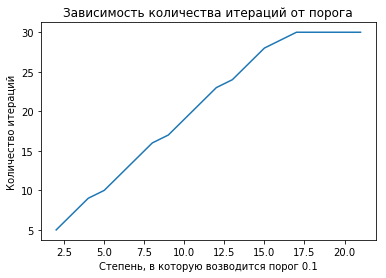

In [10]:
%matplotlib inline
plt.plot(tresh_pow, iterations)
plt.title('Зависимость количества итераций от порога')
plt.xlabel('Степень, в которую возводится порог 0.1')
plt.ylabel('Количество итераций')
plt.show()

Как мы видим

## Аппроксимация старшего собственного значения

$$ y^1 = A*y^0 $$
$$ y^2 = A*y^1 = A*A*y^0 $$

Аппроксимация происходит следующим образом: на каждом шаге рекурсии

- случайным образом инициализированный вектор мы умножаем на исходную матрицу
- Соответствующее собственное значение находится отношением скалярного произведения приближения вектора на предыдущем шаге и на данном шаге к скалярному произведению приближения вектора на данном шаге с самим собой
- После этого вектор нормируется, т.е. делится на свою евклидову норму (для упрощения вычислений)
- В момент, когда разница между значением приближения собственного значения на этом шаге и на предыдущем шаге становится меньше определённого порога, рекурсия останавливается.

In [44]:
import random
def approximize_eig(A, y, l):
    '''шаг аппроксимации старшего собственного значения'''
    y1 = A*y # собственно степенной метод: возводим матрицу в следующую степень, приближая собственный вектор
    l1 = y.T*y1/(y.T*y) # находим приближение собственного значения
    y1 = y1/np.sqrt(y1.T*y1) # нормируем y, чтобы было проще считать
    if np.sum(np.abs(l1 - l)) < 0.0001:
        return y, l1 # возвращаем собственное значение и собственный вектор
    return approximize_eig(A, y1, l1)
    

def find_eigenvalue(A):
    '''функция для поиска старшего собственного значения'''
    y = np.matrix([[random.choice(range(1, 10))] for i in range(len(A))]) # инициируем случайный ненулевой вектор
    y, l = approximize_eig(A, y, y) # запускаем рекурсию
    return y, l

In [5]:
A = np.matrix('20 3 1; 2 20 3; 3 1 10')
A

matrix([[20,  3,  1],
        [ 2, 20,  3],
        [ 3,  1, 10]])

In [47]:
find_eigenvalue(A)

(matrix([[0.71403768],
         [0.66647512],
         [0.21438541]]), matrix([[23.10367792]]))

In [52]:
np.linalg.eig(A)

(array([ 9.67250248, 23.10391607, 17.22358145]),
 matrix([[-0.0126724 ,  0.71364089,  0.68849218],
         [-0.27666917,  0.66693506, -0.70018253],
         [ 0.96088167,  0.21427623,  0.18900514]]))

### Визуализация

In [9]:
import random
def approximize_eig(A, y, l):
    '''шаг аппроксимации старшего собственного значения'''
    y1 = A*y # собственно степенной метод: возводим матрицу в следующую степень, приближая собственный вектор
    x1, x2, x3 = y1.getA()
    sbpl.scatter([x1], [x2], [x3], c='r', marker='o')
    print(x1, x2, x3)
    l1 = y.T*y1/(y.T*y) # находим приближение собственного значения
    y1 = y1/np.sqrt(y1.T*y1) # нормируем y, чтобы было проще считать
    if np.sum(np.abs(l1 - l)) < 0.0001:
        return y, l1 # возвращаем собственное значение и собственный вектор
    return approximize_eig(A, y1, l1)
    

def find_eigenvalue(A):
    '''функция для поиска старшего собственного значения'''
    y = np.matrix([[random.choice(range(1, 10))] for i in range(len(A))]) # инициируем случайный ненулевой вектор
    y, l = approximize_eig(A, y, y) # запускаем рекурсию
    return y, l

<IPython.core.display.Javascript object>


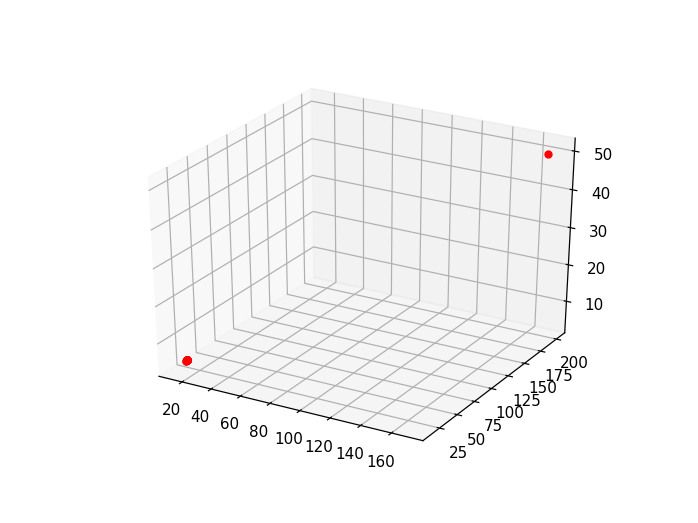

[169] [200] [50]
[15.11782761] [16.83593308] [4.52784564]
[15.48765886] [16.49068029] [4.65714069]
[15.75412063] [16.22507811] [4.74183765]
[15.94757009] [16.02269176] [4.7996764]
[16.0888547] [15.86942282] [4.84034811]
[16.19252928] [15.75384225] [4.86951746]
[16.26888833] [15.66694579] [4.89071025]
[16.32529147] [15.60175824] [4.90623838]
[16.36704708] [15.55293506] [4.91767905]
[16.39801192] [15.51641184] [4.926139]
[16.42100451] [15.48911405] [4.93241013]
[16.43809425] [15.46872486] [4.93706645]
[16.45080602] [15.45350327] [4.94052773]
[16.46026665] [15.44214371] [4.94310274]
[16.46731061] [15.43366861] [4.94501948]
[16.47255687] [15.42734682] [4.94644682]
[16.47646515] [15.42263194] [4.94751002]
[16.4793772] [15.41911592] [4.94830214]


In [10]:
fig = plt.figure()
sbpl = fig.add_subplot(111, projection='3d')
x = find_eigenvalue(A)

In [11]:
print(x)

(matrix([[0.7131337 ],
        [0.66752174],
        [0.21413793]]), matrix([[23.1042135]]))
